In [3]:
import numpy as np 
import pandas as pd
import os
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import string
from nltk.stem.porter import *
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [2]:
!pip install wordcloud

In [4]:
pd.options.mode.chained_assignment = None
%matplotlib inline

In [6]:
Airline_Tweets = pd.read_csv(r'C:\Users\shrikant\Desktop\content\Fast track Sem\Social, Text and Web Analytics\Project\Machine Learning implementation\Tweets.csv')

In [7]:
Airline_Tweets.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [8]:
Airline_Tweets.tail()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [9]:
print(len(Airline_Tweets))


14640


In [10]:
#Checking NULL Values 
Airline_Tweets.apply(lambda x: sum(x.isnull()),axis=0)


tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [11]:
# Print the first 10 tweets and numerate them with enumerate
tweets = list(Airline_Tweets['text'])

for message_no, tweets in enumerate(tweets[:10]):
    print(message_no, tweets)
    print('\n')

0 @VirginAmerica What @dhepburn said.


1 @VirginAmerica plus you've added commercials to the experience... tacky.


2 @VirginAmerica I didn't today... Must mean I need to take another trip!


3 @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse


4 @VirginAmerica and it's a really big bad thing about it


5 @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA


6 @VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)


7 @VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP


8 @virginamerica Well, I didn't…but NOW I DO! :-D


9 @VirginAmerica it was amazing, and arrived an hour early. You're too good to me.




In [12]:
#This will group tweet based on sentiment and obtain mean for each group
Airline_Tweets.groupby('airline_sentiment').mean()


,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
airline_sentiment,,,,
negative,5.692602e+17,0.933365,0.731769,0.093375
neutral,5.691841e+17,0.823303,0.000000,0.060987
positive,5.691006e+17,0.872039,0.000000,0.069403


In [13]:
#create column to record tweet length and visualization of Result 
Airline_Tweets['length'] = Airline_Tweets['text'].apply(len)


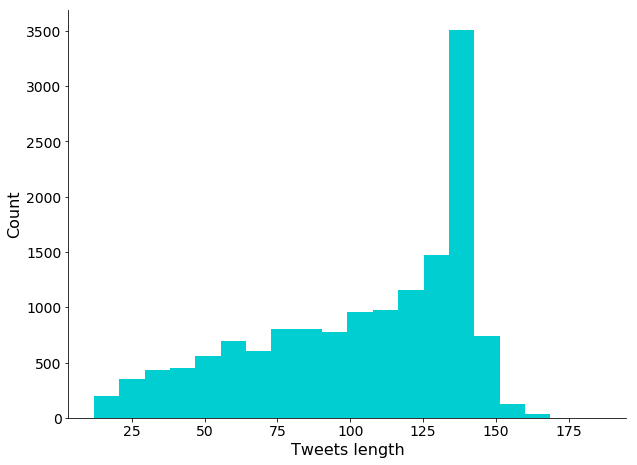

In [14]:
# Visualize tweets length
plt.figure(figsize=(10, 7.5))
ax1 = plt.subplot(111)  
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.get_xaxis().tick_bottom()  
ax1.get_yaxis().tick_left() 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Tweets length", fontsize=16)  
plt.ylabel("Count", fontsize=16)
plt.hist(list(Airline_Tweets['length'].values),  color="darkturquoise", bins=20)
ax1 = plt.gca()
ax1.set_facecolor('w')
plt.show()

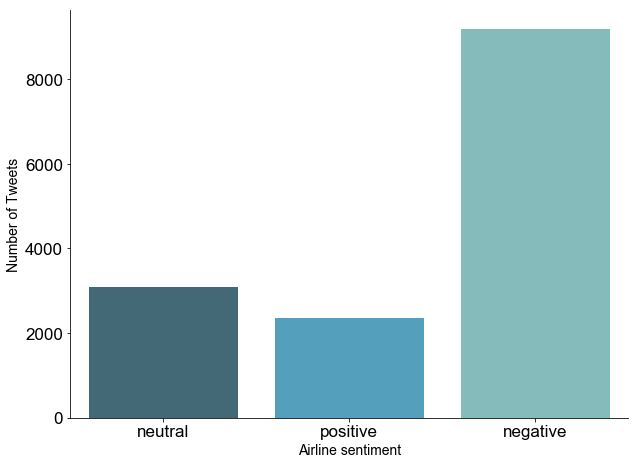

In [15]:
# no. of ocurrences we have for each airline sentiment
plt.figure(figsize=(10, 7.5))
sentiment_ocurrences = sns.countplot(x='airline_sentiment', data=Airline_Tweets, palette='GnBu_d')
sns.despine()
sns.set_style(style='white')
sentiment_ocurrences.set_xlabel("Airline sentiment",fontsize=14)
sentiment_ocurrences.set_ylabel("Number of Tweets",fontsize=14)
sentiment_ocurrences.tick_params(labelsize=17)

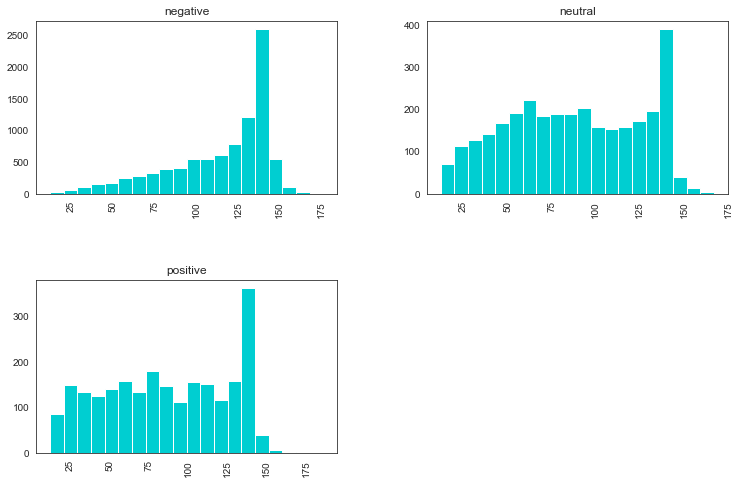

In [16]:
# Check if length is a distinguishing feature between a positive, neutral or negative tweet
Airline_Tweets.hist(column='length', by='airline_sentiment', color="darkturquoise", bins=20, figsize=(12,8))
params = {'axes.titlesize':'12',
          'xtick.labelsize':'12',
          'ytick.labelsize':'12'}
plt.rcParams.update(params)
plt.show()

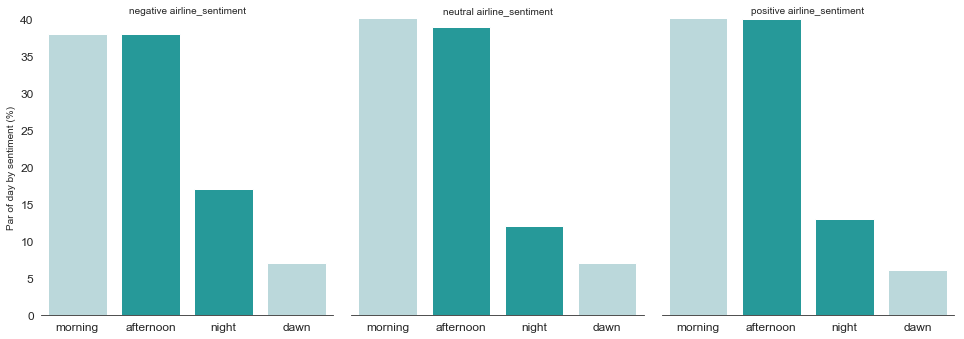

In [17]:
# Use datetime to convert tweet_created to datetime
Airline_Tweets['tweet_created'] = pd.to_datetime(Airline_Tweets['tweet_created'])
# Extract hour from tweet_created
Airline_Tweets['tweet_hour'] = Airline_Tweets['tweet_created'].dt.hour
conditions = [
    (Airline_Tweets['tweet_hour'] >= 5) & (Airline_Tweets['tweet_hour'] <= 11),
    (Airline_Tweets['tweet_hour'] >= 12) & (Airline_Tweets['tweet_hour'] <= 18),
    (Airline_Tweets['tweet_hour'] >= 19) & (Airline_Tweets['tweet_hour'] <= 24)]

choices = ['morning', 'afternoon', 'night']
Airline_Tweets['part_of_day'] = np.select(conditions, choices, default='dawn')
Airline_Tweets['count'] = 1
# Group part of day and airline sentiment to count all combinations of both
table = Airline_Tweets.groupby(['part_of_day', 'airline_sentiment'])['count'].sum()
table = pd.DataFrame(table)
table.reset_index(inplace=True)
# Calculate percentage values
table['Percentage'] = 0
table['Percentage'].loc[table['airline_sentiment'] == 'negative'] = table['count'] / 9178 
table['Percentage'].loc[table['airline_sentiment'] == 'neutral'] = table['count'] / 3099 
table['Percentage'].loc[table['airline_sentiment'] == 'positive'] = table['count'] / 2363
table['Percentage'] = round(table['Percentage'] * 100,0) #round percentage
day_part_colour = {"morning": "powderblue", "afternoon": "c", "night":"c", "dawn":"powderblue"}
ax = sns.catplot(x="part_of_day", y="Percentage", col="airline_sentiment",data=table, saturation=.6, kind="bar", ci=None, aspect=.9, palette=day_part_colour, order=['morning', 'afternoon', 'night', 'dawn'])
(ax.set_axis_labels("", "Par of day by sentiment (%)")
  #.set_xticklabels(['morning', 'afternoon', 'night', 'dawn'])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 40))
  .despine(left=True))
plt.rcParams["axes.labelsize"] = 14
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=14)

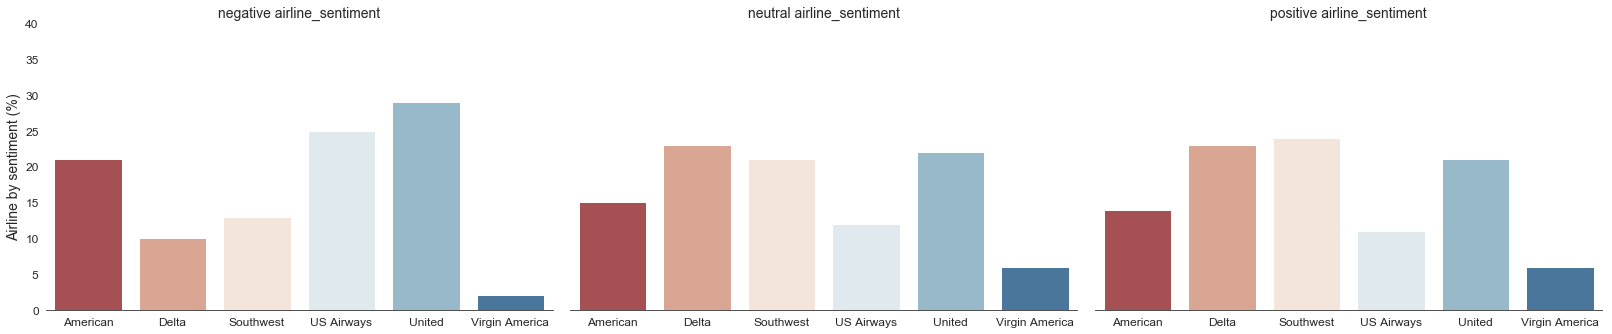

In [18]:
#morning: 5am to 11am
#afternoon: 12pm to 6pm
#night: 6pm to midnight
#dawn: midnight to 5am
# Check airline sentiment for each airline
table = Airline_Tweets.groupby(['airline', 'airline_sentiment'])['count'].sum()
table = pd.DataFrame(table)
table.reset_index(inplace=True)
table['Percentage'] = 0
table['Percentage'].loc[table['airline_sentiment'] == 'negative'] = table['count'] / 9178 
table['Percentage'].loc[table['airline_sentiment'] == 'neutral'] = table['count'] / 3099 
table['Percentage'].loc[table['airline_sentiment'] == 'positive'] = table['count'] / 2363
table['Percentage'] = round(table['Percentage'] * 100,0)
ax = sns.catplot(x="airline", y="Percentage", col="airline_sentiment",data=table, saturation=.6, kind="bar", ci=None, aspect=1.5, palette='RdBu')
(ax.set_axis_labels("", "Airline by sentiment (%)")
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 40))
  .despine(left=True))
plt.rcParams["axes.labelsize"] = 14
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=14)

In [19]:
# Check the most common negative reason
Airline_Tweets['negativereason'].value_counts()


Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [20]:
#Text Preprocessing 
#remove tweet handles from the original text column (e.g. @VirginAirlines)
#remove special characters using [^a-zA-Z#]
#remove short words
#remove ponctuation signs using string.punctuation
#remove stopwords using stopwords.words('english')
#apply stemming by removing all the suffixes from words
# Create a new text column that removes tweet handles from text column (e.g. @VirginAirlines)
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
Airline_Tweets['tidy_tweet'] = np.vectorize(remove_pattern)(Airline_Tweets['text'], "@[\w]*")
Airline_Tweets['tidy_tweet'].head()

0                                          What  said.
1     plus you've added commercials to the experien...
2     I didn't today... Must mean I need to take an...
3     it's really aggressive to blast obnoxious "en...
4             and it's a really big bad thing about it
Name: tidy_tweet, dtype: object

In [21]:
#remove special symbol
Airline_Tweets['tidy_tweet'] = Airline_Tweets['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
Airline_Tweets['tidy_tweet'].head()

0                                          What  said 
1     plus you ve added commercials to the experien...
2     I didn t today    Must mean I need to take an...
3     it s really aggressive to blast obnoxious  en...
4             and it s a really big bad thing about it
Name: tidy_tweet, dtype: object

In [22]:
# Remove words that are very short and might not have any meaning
Airline_Tweets['tidy_tweet'] = Airline_Tweets['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
Airline_Tweets['tidy_tweet'].head()

0                                            What said
1              plus added commercials experience tacky
2          didn today Must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                   really thing about
Name: tidy_tweet, dtype: object

In [23]:
# To build a classification algorithm one has to transform each tweet text in a numerical feature vector
# Use the bag of words approach to represent each word in the text by a number
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
Airline_Tweets['tidy_tweet'] = Airline_Tweets['tidy_tweet'].apply(text_process)
Airline_Tweets['tidy_tweet'].head()

0                                               [said]
1        [plus, added, commercials, experience, tacky]
2       [today, Must, mean, need, take, another, trip]
3    [really, aggressive, blast, obnoxious, enterta...
4                                      [really, thing]
Name: tidy_tweet, dtype: object

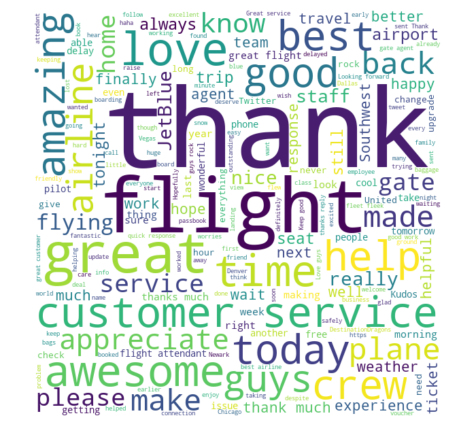

In [24]:
#use word cloud
#for postive tweets
positive_tweets = Airline_Tweets.loc[Airline_Tweets['airline_sentiment'] == 'positive']['tidy_tweet']
positive_tweets.reset_index(inplace=True, drop=True)
for i in range(len(positive_tweets)):
    positive_tweets[i] = ' '.join(positive_tweets[i])
all_positive_words = ' '.join([text for text in positive_tweets])
wordcloud = WordCloud(width=600, height=600, background_color="white").generate(all_positive_words)
# Plot graph
plt.figure(figsize=(10, 7.5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

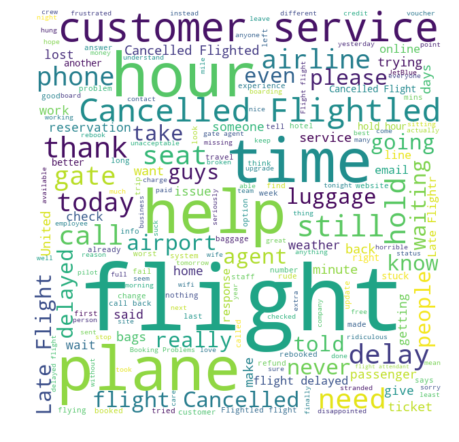

In [25]:
#for negative comment 
negative_tweets = Airline_Tweets.loc[Airline_Tweets['airline_sentiment'] == 'negative']['tidy_tweet']
negative_tweets.reset_index(inplace=True, drop=True)
for i in range(len(negative_tweets)):
    negative_tweets[i] = ' '.join(negative_tweets[i])
all_negative_words = ' '.join([text for text in negative_tweets])
wordcloud = WordCloud(width=600, height=600, background_color="white").generate(all_negative_words)
# Plot graph
plt.figure(figsize=(10, 7.5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [26]:
#perform stemming using porter stemmer 
stemmer = PorterStemmer()
Airline_Tweets['tidy_tweet'] = Airline_Tweets['tidy_tweet'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
Airline_Tweets['tidy_tweet'].head()

0                                               [said]
1                   [plu, ad, commerci, experi, tacki]
2         [today, must, mean, need, take, anoth, trip]
3    [realli, aggress, blast, obnoxi, entertain, gu...
4                                      [realli, thing]
Name: tidy_tweet, dtype: object

In [27]:
# Put back the column tidy_tweet on this original form with a string per row
clean_tweets = Airline_Tweets['tidy_tweet']
for i in range(len(clean_tweets)):
    clean_tweets[i] = ' '.join(clean_tweets[i])
Airline_Tweets['tidy_tweet'] = clean_tweets
Airline_Tweets['tidy_tweet'].head()

0                                                 said
1                         plu ad commerci experi tacki
2                 today must mean need take anoth trip
3    realli aggress blast obnoxi entertain guest fa...
4                                         realli thing
Name: tidy_tweet, dtype: object

In [28]:
#vectorization and TF-IDF calculation
# Use CountVectorizer object to create a matrix will all the words in every tweet
tweet_transformer = CountVectorizer().fit(Airline_Tweets['tidy_tweet'])
# Print total number of vocabulary words
print(len(tweet_transformer.vocabulary_))

8679


In [31]:
# Check an example in detail and take the 1st tweet in the dataset and see its vector representation
tweet_3 = Airline_Tweets['tidy_tweet'][0]
vector_3 = tweet_transformer.transform([tweet_3])
print(vector_3)
print(vector_3.shape)


  (0, 6418)	1
(1, 8679)


In [32]:
# Check an example in detail and take the 10th tweet in the dataset and see its vector representation
tweet_3 = Airline_Tweets['tidy_tweet'][9]
vector_3 = tweet_transformer.transform([tweet_3])
print(vector_3)
print(vector_3.shape)

  (0, 231)	1
  (0, 391)	1
  (0, 2163)	1
  (0, 3029)	1
  (0, 3421)	1
(1, 8679)


In [33]:
# Apply the transformer in the entire tweets series
tweet_bag_of_words = tweet_transformer.transform(Airline_Tweets['tidy_tweet'])
# Check the shape and number of non-zero ocurrences
print('Shape of Matrix: ', tweet_bag_of_words.shape)
print('Amount of Non-Zero occurences: ', tweet_bag_of_words.nnz)

Shape of Matrix:  (14640, 8679)
Amount of Non-Zero occurences:  104652


In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
tweet_tfidf_transformer = TfidfTransformer().fit(tweet_bag_of_words)
tweet_tfidf = tweet_tfidf_transformer.transform(tweet_bag_of_words)
print(tweet_tfidf.shape)

(14640, 8679)


In [35]:
#Build Multinomial Naive Bayes classification model
# Add new column for airline sentiment with binary outcome: 1 for negative comment 0 for not negative
# Create dictionary to map
sentiment_dictionary = {'negative': 1, 'neutral': 0, 'positive': 0}
# Add new column mapping the dictionary
Airline_Tweets['airline_sentiment_model'] = Airline_Tweets['airline_sentiment'].map(sentiment_dictionary)
# Check first 5 rows
Airline_Tweets.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,tweet_coord,tweet_created,tweet_location,user_timezone,length,tweet_hour,part_of_day,count,tidy_tweet,airline_sentiment_model
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,...,NaN,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada),35,11,morning,1,said,0
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada),72,11,morning,1,plu ad commerci experi tacki,0
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,...,NaN,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada),71,11,morning,1,today must mean need take anoth trip,0
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada),126,11,morning,1,realli aggress blast obnoxi entertain guest fa...,1
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada),55,11,morning,1,realli thing,1


In [36]:
# Take X and y variables using the TF-IDF vectorization from the previous step
X = tweet_tfidf
y = Airline_Tweets['airline_sentiment_model']
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3)
print(X_train.shape[0], X_test.shape[0], X_train.shape[0] + X_test.shape[0])

10248 4392 14640


In [37]:
# Create the Multinomial Naives Bayes object
tweet_sentiment_model = MultinomialNB()
tweet_sentiment_model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [38]:
predictions = tweet_sentiment_model.predict(X_test)


In [39]:
# Print confusion matrix
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, predictions))

[[ 760  840]
 [  97 2695]]


In [40]:
# Print classification report
from sklearn.metrics import classification_report
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.47      0.62      1600
           1       0.76      0.97      0.85      2792

   micro avg       0.79      0.79      0.79      4392
   macro avg       0.82      0.72      0.74      4392
weighted avg       0.81      0.79      0.77      4392



In [43]:
#Accuracy = (Number of elements correctly classified)/(Total elements)
print("Accuracy is")
print ((760+2695)/4392)

Accuracy is
0.7866575591985429
